In [ ]:
%run configuration.ipynb

# Question 1 
Of the industries where salaries and wages data did NOT exist in 2016 and only appeared later, which industry had the highest average value for actual filled jobs across time and what was that value?

In [25]:
 
Q1 = con.execute("""
      with 
          Salaries_2016 as (
            select 
                 distinct Series_title_2
            from financial_data
            where FLOOR(period) = 2016
                  and "Series_title_1" = 'Salaries and wages'
      ),
          Salaries_post_2016 as (
          select 
                 distinct Series_title_2
          from financial_data
          where "Series_title_1" = 'Salaries and wages'
                and FLOOR(period) >= 2017
                and Series_title_2 not in (select * from Salaries_2016)
      )
      select 
            Series_title_2 as industry
          , avg(Data_value) as avg_value
      from employment_data
      where Series_title_2 in (select * from Salaries_post_2016)
            and "group" = 'Industry by employment variable'
            and Series_title_3 = 'Actual'
            and Series_title_1 = 'Filled jobs'
      group by 1
      order by 2 desc 
      limit 1
""").df()

display(Q1)


,industry,avg_value
0,Retail Trade,194053.71


# Question 2
Provide the answer and write a DuckDB SQL query to show which year/month combination and industry had the second highest seasonally adjusted operating income sales across all the business industries in New Zealand that are categorised as NZSIOC level 2.

In [4]:
Q2 = con.execute("""
     with rank_by_sales as (
        select 
              period  as 'year/month'
            , Series_title_2 as industry
            , Data_value as value
            , row_number () over (order by Data_value desc) as rank 
        from financial_data
        where 
        Series_title_1 = 'Sales (operating income)'
        and Series_title_4 = 'Seasonally adjusted'
        and "Group" = 'Industry by financial variable (NZSIOC Level 2)' 
      )
      select * 
      from rank_by_sales
      where rank = 2   
""").df()

display(Q2)


,year/month,industry,value,rank
0,2023.03,Wholesale Trade,38810.02,2


# Question 3
Create a DuckDB SQL query to calculate the quarterly cumulative number of filled jobs over time for the territorial authority with the highest average value of filled jobs across time. You may not
use window functions in your query.

reference: Filled jobs and gross earnings are output at the regional level and at the territorial authority level. For filled jobs there are two separate measures – the first is based on the address of the employee, and the second is based on the location of the geo of their employer. 

In [5]:
#  by subquery 
Q3_1 = con.execute("""
    with maxauthority as (
        select 
            series_title_2 as region
        from employment_data
        where 
            "group" = 'Territorial authority by employment variable'
            and series_title_1 = 'Filled jobs'
        group by 1
        order by avg(data_value) desc
        limit 1
      )
    select 
        e.period
      , e.series_title_2 as region
      , e.data_value as filled_jobs
      , (select sum(f.data_value)
         from employment_data f
         where 
            f.series_title_2 = e.series_title_2 
            and f.period <= e.period
            and f.group = 'Territorial authority by employment variable'
            and f.series_title_1 in ('Filled jobs')
                 ) as cumulative_filled_jobs
    from employment_data e
    where 
        e.series_title_2 = (select region from maxauthority)
        and e.group = 'Territorial authority by employment variable'
        and e.series_title_1 in ('Filled jobs')
    order by e.period;
""").df()

display(Q3_1)

,Period,region,filled_jobs,cumulative_filled_jobs
0,2011.06,Auckland,558627.00,558627.00
1,2011.09,Auckland,565439.00,1124066.00
2,2011.12,Auckland,573729.00,1697795.00
3,2012.03,Auckland,560373.00,2258168.00
4,2012.06,Auckland,572938.00,2831106.00
5,2012.09,Auckland,570677.00,3401783.00
6,2012.12,Auckland,579724.00,3981507.00
7,2013.03,Auckland,574807.00,4556314.00
8,2013.06,Auckland,588911.00,5145225.00
9,2013.09,Auckland,586356.00,5731581.00


In [27]:
# by window function 
Q3_2 = con.execute("""
    with maxauthority as (
        select 
            series_title_2 as region
        from employment_data
        where 
            "group" = 'Territorial authority by employment variable'
            and series_title_1 = 'Filled jobs'
        group by 1
        order by avg(data_value) desc
        limit 1
      ),
        CumulativeJobs AS (
            select 
                  Period
                , Series_title_2 as authority
                , Data_value as filled_jobs
                , sum(Data_value) over (partition by Series_title_2 order by Period) as cumulative_filled_jobs
            from employment_data
            where Series_title_2 = (select region from MaxAuthority)
                  and "Group" = 'Territorial authority by employment variable'
                  and Series_title_1 in ('Filled jobs')
        )
                   
        SELECT *
        FROM CumulativeJobs
        ORDER BY Period;
                  """).df()
display(Q3_2)


,Period,authority,filled_jobs,cumulative_filled_jobs
0,2011.06,Auckland,558627.00,558627.00
1,2011.09,Auckland,565439.00,1124066.00
2,2011.12,Auckland,573729.00,1697795.00
3,2012.03,Auckland,560373.00,2258168.00
4,2012.06,Auckland,572938.00,2831106.00
5,2012.09,Auckland,570677.00,3401783.00
6,2012.12,Auckland,579724.00,3981507.00
7,2013.03,Auckland,574807.00,4556314.00
8,2013.06,Auckland,588911.00,5145225.00
9,2013.09,Auckland,586356.00,5731581.00


# Question 4
Assume these datasets are used in part of a pipeline where the file that arrives may contain unwanted duplicates, incorrect datatypes, missing dates or other data quality aberrations. What things could be done programmatically to make sure the input data is of adequate quality and improve the pipeline? 

One practice is to design and implement a rule-based, reusable validation framework. This framework separates validation rules from other analytical code, making these rules independent, easy to manage, and reusable across various projects, also brings benefits to the wilder teams.

Below is the sample flow overview with basic Python snippet that conceptualises the validation task within a data pipeline:

![rule-based, reusable validation framework](asset/image.png)



In [28]:
# validator wheels 
def duplicates_validator(df, *fields):
    """
    Validate that the specified fields have unique values in the DataFrame.
    """
    subset = fields if len(fields) > 1 else fields[0]
    duplicates_count = df.duplicated(subset=subset, keep=False).sum()
    if duplicates_count > 0:
        return f"Duplicates found in {', '.join(fields)}: {duplicates_count} instances"
    else:
        return f"No duplicates found in {', '.join(fields)}."
        
def null_fields_validator(df, *fields):
    """
    Validate that all specified fields are non-null.
    """
    report = {}
    for field in fields:
        null_count = df[field].isnull().sum()
        if null_count > 0:
            report[field] = f"Null values found in field: {field}, Count: {null_count}"
        else:
            report[field] = f"No null values in field: {field}"
    return report

In [8]:

def load_config(path):
    with open(path, 'r') as file:
        return yaml.safe_load(file)

def apply_validations(df, validation_config):
    results = {}
    for validation in validation_config['validations']:
        validator = globals()[validation['type']]
        report = validator(df, *validation['fields'])
        results[validation['name']] = report
    return results

def print_validation_report(report, title="Validation Report"):
    """ 
    General Report Function
    """
    print(f"\n{title}")
    print('-' * len(title))  
    for key, value in report.items():
        print(f"{key}: {value}")
    print("\n" + "="*40)  

config = load_config('validation_config.yaml')

# Load data based on configuration
data = pd.read_csv(config['table_name'])

# Perform validations as specified in the config
validation_results = apply_validations(data, config)

# Print the validation results
print(f"Validating data for project: {config['project_id']}")
print_validation_report(validation_results)


Validating data for project:  Advanced Analytics MLE Technical Exercise

Validation Report
-----------------
Check Null Fields: {'Data_value': 'Null values found in field: Data_value, Count: 698', 'Period': 'No null values in field: Period'}
Check Duplicates: Duplicates found in Data_value, Period: 4008 instances



# Question 5
Create summary statistics and perform a statistical analysis or create a model using the provided datasets. We are interested in your justification for your choices and reasoning. You may join the data to other datasets from https://www.stats.govt.nz/large-datasets/csv-files-for-download/ if you wish.

In [29]:
#  Data Cleaning and Preprocessing
def clean_employment_data(df):
    """
    Cleans the employment data by removing unnecessary columns, null value, and converting the 'Period' column to datetime format.
    """
    df_cleaned = df.copy()
    columns_to_drop = ['Suppressed', 'STATUS', 'Series_reference', 'UNITS', 'Magnitude', 'Subject', 'Series_title_4', 'Series_title_5']
    df_cleaned = df_cleaned.drop(columns=[col for col in columns_to_drop if col in df_cleaned.columns])
    df_cleaned = df_cleaned.dropna(subset=['Data_value'])
    df_cleaned['Period'] = pd.to_datetime(df_cleaned['Period'].astype(str), format='%Y.%m')
    return df_cleaned


def filter_employment_data(df, series_title_1_values):
    """
    Filters the employment data based on specified Series_title_1 values.
    """
    filtered_data = df[(df['Group'] == 'Industry by employment variable') &
                       (df['Series_title_2'] != 'Total Industry') &
                       (df['Series_title_1'].isin(series_title_1_values))]
    return filtered_data


#  Visualization Functions
def plot_top_industries(pivot_data, top_industries):
    """
    Plots trends for filled jobs and total earnings by top industries.
    """
    for title in ['Filled jobs', 'Total earnings']:
        plt.figure(figsize=(10, 6))
        for industry in top_industries:
            sns.lineplot(data=pivot_data, x='Period', y=(industry, title), label=industry)
        plt.title(f'Trends in {title} by Top 5 Industries')
        plt.xlabel('Period')
        plt.ylabel(f'{title}')
        plt.legend(title='Industry', loc='upper left', bbox_to_anchor=(1, 1))
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


#  Anomaly Detection
def detect_anomalies(overall_employment):
    """
    Detects anomalies in overall employment data using Isolation Forest.
    """
    model = IsolationForest(contamination=0.05, random_state=42)
    model.fit(overall_employment['Pct_change'].values.reshape(-1, 1))
    anomalies = model.predict(overall_employment['Pct_change'].values.reshape(-1, 1))
    overall_employment['Anomaly'] = pd.Series(anomalies, index=overall_employment.index).map({1: 0, -1: 1})
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=overall_employment, x='Period', y='Data_value', label='Total Employment')
    plt.scatter(overall_employment[overall_employment['Anomaly'] == 1]['Period'], 
                overall_employment[overall_employment['Anomaly'] == 1]['Data_value'], 
                color='red', label='Anomaly')
    plt.title('Anomaly Detection in Overall Employment Data')
    plt.xlabel('Period')
    plt.ylabel('Total Jobs')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [30]:
# Clean the employment data
employment_data_cleaned  = clean_employment_data(employment_data)
employment_data_cleaned

,Period,Data_value,Group,Series_title_1,Series_title_2,Series_title_3
0,2011-06-01,80078.00,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual
1,2011-09-01,78324.00,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual
2,2011-12-01,85850.00,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual
3,2012-03-01,90743.00,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual
4,2012-06-01,81780.00,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual
...,...,...,...,...,...,...
22929,2023-03-01,815174.00,Territorial authority by employment variable,Filled jobs (workplace location based),Auckland,Actual
22930,2023-06-01,829923.00,Territorial authority by employment variable,Filled jobs (workplace location based),Auckland,Actual
22931,2023-09-01,826486.00,Territorial authority by employment variable,Filled jobs (workplace location based),Auckland,Actual
22932,2023-12-01,832221.00,Territorial authority by employment variable,Filled jobs (workplace location based),Auckland,Actual


### Summary 1 - Top Industries by Total Earnings and Filled Jobs:
identifies the leading industries where economic activity is most concentrated and which industries are driving employment, in terms of both total earnings and the number of filled jobs.

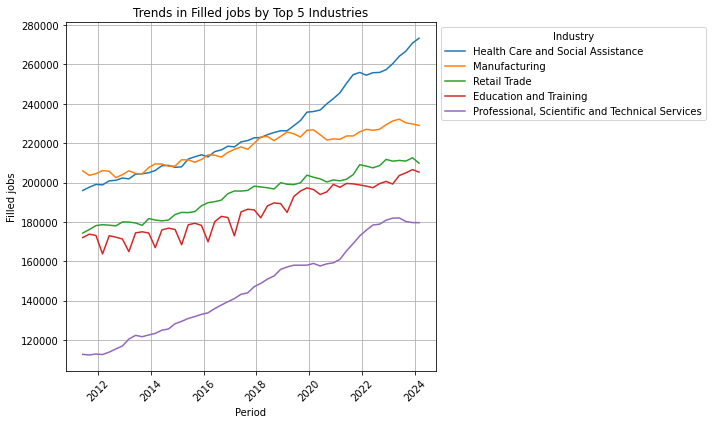

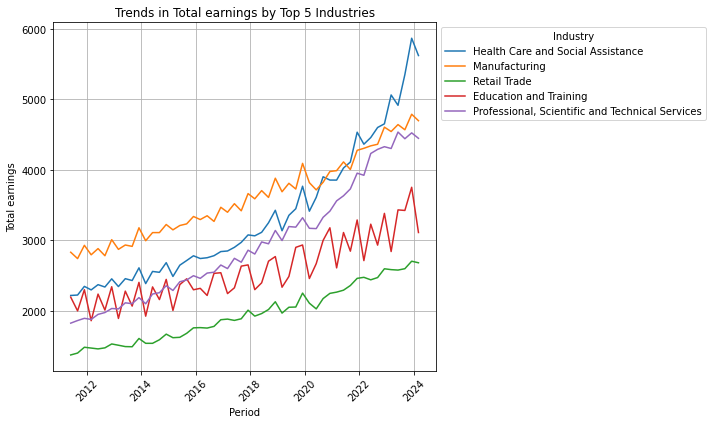

In [31]:
# Summary 1 - Top industries analysis and visualization
top_industries_data = filter_employment_data(employment_data_cleaned, ['Filled jobs', 'Total earnings'])

top_industries = top_industries_data.groupby('Series_title_2')['Data_value'].sum().nlargest(5).index

pivot_data = top_industries_data.pivot_table(index=['Period'], columns=['Series_title_2', 'Series_title_1'], values='Data_value').reset_index()

plot_top_industries(pivot_data, top_industries)


### Summary 2 - Anomaly Detection in Overall Employment Data
To identify unusual patterns or outliers in the employment data over time, for detecting shifts in economic trends, potential errors in data, or events that could indicate significant changes in the history.

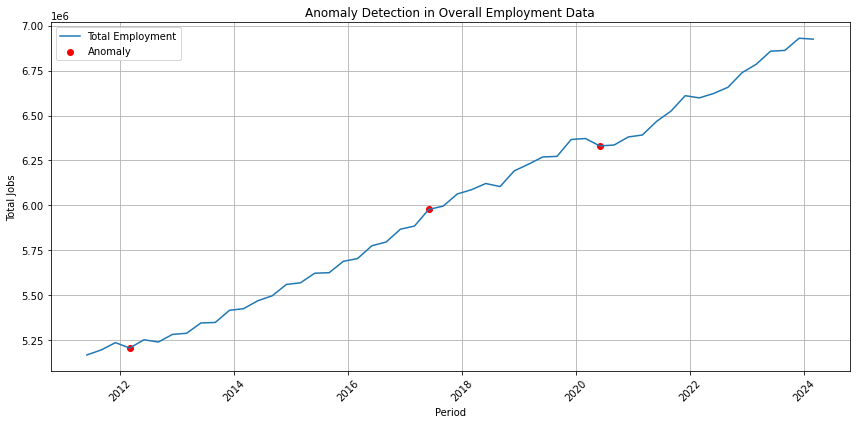

In [33]:
industry_data_jobs = filter_employment_data(employment_data_cleaned, ['Filled jobs'])

overall_employment = industry_data_jobs.groupby('Period')['Data_value'].sum().reset_index()

overall_employment['Pct_change'] = overall_employment['Data_value'].pct_change().fillna(0)

detect_anomalies(overall_employment)
 